In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

In [8]:
cifar10 = tf.keras.datasets.cifar10  # Carrega o conjunto de dados 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliza as imagens dividindo por 255, para que os valores de pixels fiquem entre 0 e 1
y_train, y_test = y_train.flatten(), y_test.flatten()  # Achata os arrays de rótulos (eles têm formato (N, 1)) para (N,)

print("x_train.shape: ", x_train.shape)  
print("y_train.shape: ", y_train.shape)  


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 708s 4us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [9]:
K = len(set(y_train))
print("numero de classes: ", K)

numero de classes:  10


In [10]:
# Construir o modelo com a API funcional
i = Input(shape=x_train[0].shape)  # Entrada com shape das imagens (28, 28, 1)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Criar o modelo
model = Model(i, x)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3446 - loss: 1.7792 - val_accuracy: 0.5358 - val_loss: 1.2923
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5245 - loss: 1.3208 - val_accuracy: 0.5903 - val_loss: 1.1348
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5880 - loss: 1.1504 - val_accuracy: 0.6339 - val_loss: 1.0295
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6192 - loss: 1.0667 - val_accuracy: 0.6205 - val_loss: 1.0368
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6478 - loss: 0.9920 - val_accuracy: 0.6738 - val_loss: 0.9330
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6685 - loss: 0.9218 - val_accuracy: 0.6709 - val_loss: 0.9468
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6884 - loss: 0.8685 - val_accuracy: 0.6916 - val_loss: 0.8848
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7003 - loss:

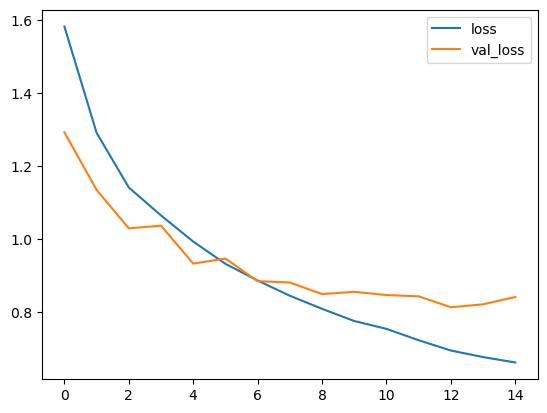

In [12]:
plt.plot(r.history["loss"], label="loss")  # Plota a curva de perda de treinamento usando os valores armazenados em r.history["loss"]
plt.plot(r.history["val_loss"], label="val_loss")  # Plota a curva de perda de validação usando os valores armazenados em r.history["val_loss"]
plt.legend()  

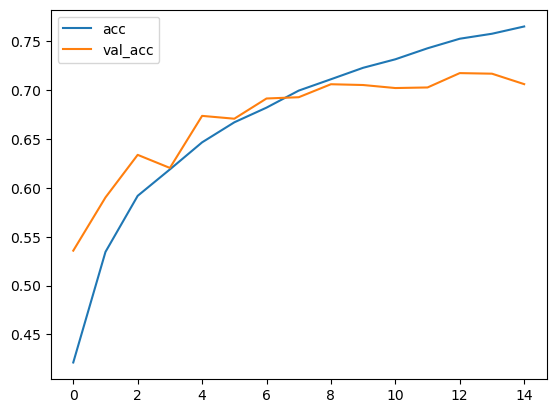

In [13]:
plt.plot(r.history["accuracy"], label="acc")  # Plota a curva de acurácia de treinamento usando os valores armazenados em r.history["accuracy"]
plt.plot(r.history["val_accuracy"], label="val_acc")  # Plota a curva de acurácia de validação usando os valores armazenados em r.history["val_accuracy"]
plt.legend()  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[673  19  59  37  29  18  25  20  73  47]
 [  5 801   9  16   7  12  18  11  18 103]
 [ 44   6 559  84 100  79  74  33  11  10]
 [  3   5  57 511  66 215  98  37   3   5]
 [  8   1  66  69 676  34  52  88   4   2]
 [  8   1  27 189  51 633  37  50   3   1]
 [  2   3  24  55  48  28 830   3   5   2]
 [  8   2  17  40  71  58  14 787   1   2]
 [ 44  29  12  38  23  11  21   7 790  25]
 [ 19  58   3  36  12  11  15  23  20 803]]


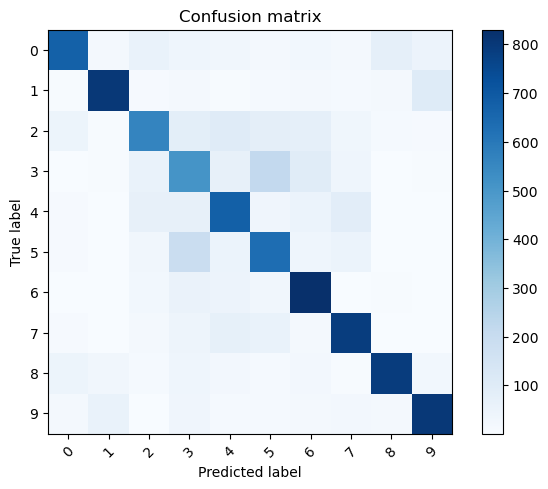

In [14]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normaliza a matriz dividindo cada linha pela soma
        print("Normalized confusion matrix")  # Informa que a matriz foi normalizada
    else:
        print('Confusion matrix, without normalization')  # Informa que a matriz não foi normalizada

    print(cm)  # Exibe a matriz de confusão no terminal

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Plota a matriz de confusão com a cor definida por cmap
    plt.title(title)  # Define o título do gráfico
    plt.colorbar()  # Adiciona a barra de cores ao lado da matriz
    tick_marks = np.arange(len(classes))  # Cria os ticks para as classes no eixo x e y
    plt.xticks(tick_marks, classes, rotation=45)  # Rotaciona e define os rótulos do eixo x
    plt.yticks(tick_marks, classes)  # Define os rótulos do eixo y

    plt.tight_layout()  # Ajusta o layout do gráfico para não cortar nada
    plt.ylabel('True label')  # Rótulo do eixo y (rótulos reais)
    plt.xlabel('Predicted label')  # Rótulo do eixo x (rótulos previstos)
    plt.show()  # Exibe o gráfico

p_test = model.predict(x_test).argmax(axis=1)  # Realiza as previsões do modelo e escolhe a classe com maior probabilidade
cm = confusion_matrix(y_test, p_test)  # Cria a matriz de confusão comparando as previsões com os valores reais
plot_confusion_matrix(cm, list(range(10)))  # Plota a matriz de confusão para as 10 classes (presumivelmente de 0 a 9)


In [25]:
labels = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", 
    "frog", "horse", "ship", "truck"
] 

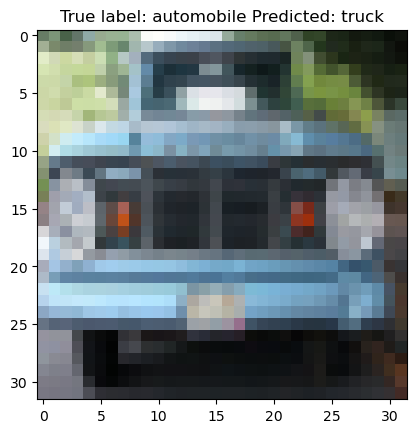

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]  # Encontra os índices onde as previsões (p_test) são diferentes dos rótulos reais (y_test)
i = np.random.choice(misclassified_idx)  # Escolhe aleatoriamente um dos índices onde a previsão foi incorreta
plt.imshow(x_test[i], cmap="gray")  # Plota a imagem do teste com índice 'i', em escala de cinza
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))  # Define o título do gráfico com o rótulo verdadeiro e o previsto, acessando as classes a partir da lista 'labels'
plt.show()  # Exibe o gráfico
